In [1]:
import prim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [3]:
inputs = pd.read_csv("../Results_DMU/Murrumbala/scenario_values.csv")

low climate change is lower than current so it's 0 instead of 2

In [4]:
inputs.Climate_change_scenario.replace(2,0,inplace=True)

In [6]:
cost = pd.read_csv("../Results_DMU/Memba/COST_d7_v2.csv")
npv = pd.read_csv("../Results_DMU/Memba/NPV_d7_v2.csv")

In [7]:
reduced_risk = pd.read_csv("../Results_DMU/Memba/BEN_ind_d7_v2.csv",dtype='float64')
avoided_repair = pd.read_csv("../Results_DMU/Memba/BEN_direct_d7_v2.csv",dtype='float64')
ruc_decrease = pd.read_csv("../Results_DMU/Memba/BEN_add_d7_v2.csv",dtype='float64')
isolated_trips = pd.read_csv("../Results_DMU/Memba/BEN_isol_d7_v2.csv",dtype='float64')
maintenance_sav = pd.read_csv("../Results_DMU/Memba/BEN_sav_d7_v2.csv",dtype='float64')

In [8]:
benef = reduced_risk+avoided_repair+ruc_decrease+maintenance_sav

In [9]:
import seaborn as sns
sns.set_context("notebook",rc={"font.size": 18})
sns.set_style("whitegrid")

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [10]:
reduced_risk.sample(3)

,Paving link#1,Paving link#2,Improve drainange all,Gravel link #1 and #2,Gravel alternatives routes
394,-1250000,-1700000,-1690000,-1580000,-1520000
1390,14800000,12900000,9330000,13300000,13600000
1790,1180000,280000,-127000,458000,572000


In [11]:
def savefig(path, **kwargs):
    #Saves in both png and pdf
    
    plt.tight_layout()
    
    path = path.replace(".png","")
    path = path.replace(".pdf","")

    plt.savefig(path+".png", )
    plt.savefig(path+".pdf", )

In [15]:
new_names = dict({'Paving link#1':'Pave1', 'Paving link#2':'Pave2', 'Improve drainange all':'drainage',
       'Gravel link #1 and #2':'gravel12', 'Gravel alternatives routes':'gravelothers'})

In [16]:
new_names2 = dict({'Paving link#1':'Inv. 1\n(paving\nR650)', 'Paving link#2':'Inv. 2\n(partial\npaving\nR650)', 'Improve drainange all':'Inv. 3\n(drainage)',
       'Gravel link #1 and #2':'Inv. 4\n(gravel\nR650)', 'Gravel alternatives routes':'Inv. 5\n(gravel\nothers)'})

In [19]:
figfolder = "Memba/"

C:\Miniconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


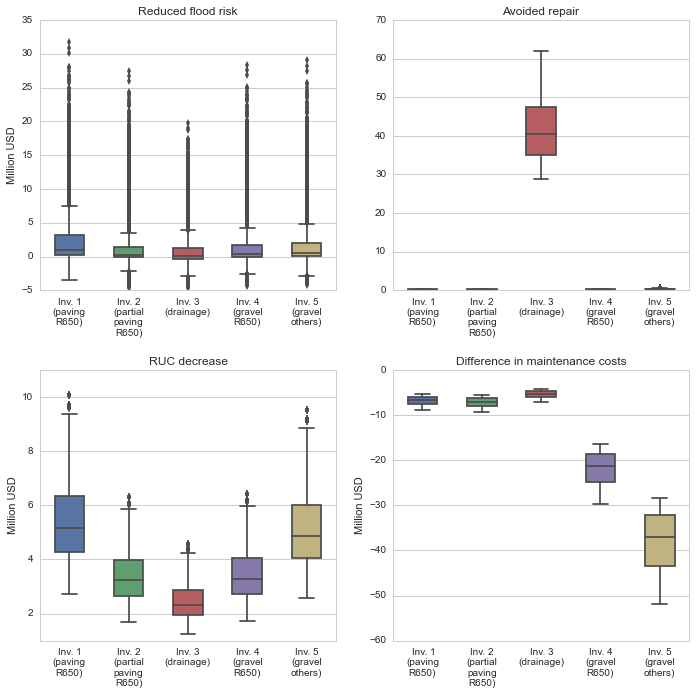

In [20]:
fig = plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(10**(-6)*reduced_risk.rename(columns=new_names2),width=0.5)
plt.ylabel("Million USD")
plt.title("Reduced flood risk")
plt.subplot(222)
sns.boxplot(10**(-6)*avoided_repair.rename(columns=new_names2),width=0.5)
plt.title("Avoided repair")
plt.subplot(223)
sns.boxplot(10**(-6)*ruc_decrease.rename(columns=new_names2),width=0.5)
plt.title("RUC decrease")
plt.ylabel("Million USD")
plt.subplot(224)
sns.boxplot(10**(-6)*maintenance_sav.rename(columns=new_names2),width=0.5)
plt.ylabel("Million USD")
plt.title("Difference in maintenance costs")

savefig(figfolder+"boxplot_benefit_break_down")

In [21]:
def anova_table(varin,data,experiments_cols):
    formula = varin+" ~ " + "+".join(experiments_cols)
    olsmodel=ols(formula,data=data).fit()
    table=anova_lm(olsmodel)
    table['sum_sq_pc']=table['sum_sq']/table['sum_sq'].sum()
    table=table.sort(['sum_sq'],ascending=False)
    return table['sum_sq_pc']

In [22]:
reduced_risk.columns

Index(['Paving link#1', 'Paving link#2', 'Improve drainange all',
       'Gravel link #1 and #2', 'Gravel alternatives routes'],
      dtype='object')

In [23]:
anova_reduced_risk=pd.DataFrame(index=reduced_risk.rename(columns=new_names).columns,columns=inputs.columns)
for i in reduced_risk.rename(columns=new_names).columns:
    anova_reduced_risk.loc[i,:]=anova_table(i,pd.concat([inputs,reduced_risk],axis=1).rename(columns=new_names),inputs.columns)

In [24]:
anova_reduced_risk

,Repair_time,Discount_Rate,Traffic_growth,Flood_duration,Agriculture_elas,Climate_change_scenario
Pave1,0.02675818,0.008999111,0.008055694,0.0001045453,0.006653402,0.1366925
Pave2,0.01616976,0.005718416,0.005102175,0.0001238271,0.004215063,0.1331053
drainage,0.01148553,0.004453986,0.003963822,0.0002116404,0.003280641,0.1132017
gravel12,0.01840233,0.006406611,0.005733381,0.0001204348,0.004731194,0.1335034
gravelothers,0.01980734,0.006856705,0.006122831,0.0001179973,0.005045944,0.1338006


In [25]:
anova_avoided_repair=pd.DataFrame(index=avoided_repair.rename(columns=new_names).columns,columns=inputs.columns)
for i in avoided_repair.rename(columns=new_names).columns:
    anova_avoided_repair.loc[i,:]=anova_table(i,pd.concat([inputs,avoided_repair],axis=1).rename(columns=new_names),inputs.columns)

In [26]:
anova_avoided_repair

,Repair_time,Discount_Rate,Traffic_growth,Flood_duration,Agriculture_elas,Climate_change_scenario
Pave1,0.00213973,0.254151,1.29521e-05,9.050059e-07,9.936684e-07,0.5735489
Pave2,0.00213973,0.254151,1.29521e-05,9.050059e-07,9.936684e-07,0.5735489
drainage,0.007117037,0.8518667,4.505544e-05,2.961481e-06,2.501249e-06,0.117037
gravel12,0.00213973,0.254151,1.29521e-05,9.050059e-07,9.936684e-07,0.5735489
gravelothers,0.004314377,0.515876,2.68742e-05,1.585531e-06,1.575183e-06,0.2854319


In [27]:
anova_ruc_decrease=pd.DataFrame(index=ruc_decrease.rename(columns=new_names).columns,columns=inputs.columns)
for i in ruc_decrease.rename(columns=new_names).columns:
    anova_ruc_decrease.loc[i,:]=anova_table(i,pd.concat([inputs,ruc_decrease],axis=1).rename(columns=new_names),inputs.columns)

In [28]:
anova_ruc_decrease

,Repair_time,Discount_Rate,Traffic_growth,Flood_duration,Agriculture_elas,Climate_change_scenario
Pave1,0.01341455,0.3670582,0.3070693,0.000161468,0.2642749,7.736072e-29
Pave2,0.01339984,0.3670936,0.3071864,0.0001563551,0.2642291,3.893919e-29
drainage,0.01340554,0.3673493,0.3069088,0.0001609512,0.2642238,7.618348e-29
gravel12,0.01347906,0.3670807,0.3072581,0.0001516173,0.2641349,2.147689e-29
gravelothers,0.01340151,0.3671099,0.3072457,0.0001602797,0.2641771,8.844344e-29


In [29]:
anova_total=pd.DataFrame(index=benef.rename(columns=new_names).columns,columns=inputs.columns)
for i in benef.rename(columns=new_names).columns:
    anova_total.loc[i,:]=anova_table(i,pd.concat([inputs,benef],axis=1).rename(columns=new_names),inputs.columns)

In [30]:
anova_total

,Repair_time,Discount_Rate,Traffic_growth,Flood_duration,Agriculture_elas,Climate_change_scenario
Pave1,0.02911495,0.007194645,0.04684877,4.995331e-05,0.03997289,0.1203258
Pave2,0.01636611,1.127588e-05,0.02614931,8.355994e-05,0.02238672,0.1222202
drainage,0.01459511,0.6040671,0.005576996,1.808817e-05,0.004252986,0.1965781
gravel12,0.007263459,0.1786956,0.02182198,8.702316e-05,0.01915208,0.1014257
gravelothers,0.002197621,0.4395601,0.02264873,5.237869e-05,0.02045433,0.07378401


In [31]:
cost.name="cost"
reduced_risk.name="reduced_risk"
avoided_repair.name="avoided_repair"
ruc_decrease.name="ruc_decrease"
benef.name="benef"
isolated_trips.name="isolated_trips"
maintenance_sav.name='maintenance_sav'

In [32]:
a = cost.unstack()
b = benef.unstack()
c = isolated_trips.unstack()

In [33]:
a.index.names = ["intervention","scenario"]
b.index.names = ["intervention","scenario"]
c.index.names = ["intervention","scenario"]

In [34]:
a.index.difference(b.index)

MultiIndex(levels=[[], []],
           labels=[[], []],
           names=['intervention', 'scenario'])

In [35]:
m = pd.concat([pd.DataFrame(a,columns=["cost"]),pd.DataFrame(b,columns=["benefits"]),pd.DataFrame(c,columns=["isolated_trips"])],axis=1)

In [36]:
inputs.index.name="scenario"

In [37]:
m = m.reset_index().merge(inputs.reset_index()).set_index(["intervention","scenario"])

In [38]:
m.columns

Index(['cost', 'benefits', 'isolated_trips', 'Repair_time', 'Discount_Rate',
       'Traffic_growth', 'Flood_duration', 'Agriculture_elas',
       'Climate_change_scenario'],
      dtype='object')

In [39]:
m['npv']=m.benefits-m.cost
m['saved_trip_per_dollar'] = m.isolated_trips/m.cost
m['benefit_cost_ratio'] = m.benefits/m.cost

In [40]:
df3 = pd.DataFrame()

for i in ['Gravel alternatives routes', 'Gravel link #1 and #2', 'Improve drainange all', 'Paving link#1', 'Paving link#2']:

    formula="npv ~ Repair_time + Discount_Rate + Traffic_growth + Flood_duration + Agriculture_elas + Climate_change_scenario"
    olsmodel=ols(formula,data=m.loc[i]).fit()
    table=anova_lm(olsmodel)
    df3[i]=table['sum_sq']/table['sum_sq'].sum()
    
df3

,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2
Repair_time,0.000380,0.000368,0.014662,0.022971,0.010607
Discount_Rate,0.801115,0.577720,0.523090,0.014798,0.057619
Traffic_growth,0.006961,0.010435,0.006692,0.046027,0.024202
Flood_duration,0.000026,0.000053,0.000024,0.000054,0.000082
Agriculture_elas,0.006716,0.009517,0.005130,0.039868,0.020918
Climate_change_scenario,0.024762,0.051578,0.240324,0.120198,0.115722
Residual,0.160040,0.350329,0.210079,0.756084,0.770850


In [41]:
df = pd.DataFrame()

for i in ['Gravel alternatives routes', 'Gravel link #1 and #2', 'Improve drainange all', 'Paving link#1', 'Paving link#2']:

    formula="benefits ~ Repair_time + Discount_Rate + Traffic_growth + Flood_duration + Agriculture_elas + Climate_change_scenario"
    olsmodel=ols(formula,data=m.loc[i]).fit()
    table=anova_lm(olsmodel)
    df[i]=table['sum_sq']/table['sum_sq'].sum()

In [42]:
df

,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2
Repair_time,0.002198,0.007263,0.014595,0.029115,0.016366
Discount_Rate,0.439560,0.178696,0.604067,0.007195,0.000011
Traffic_growth,0.022649,0.021822,0.005577,0.046849,0.026149
Flood_duration,0.000052,0.000087,0.000018,0.000050,0.000084
Agriculture_elas,0.020454,0.019152,0.004253,0.039973,0.022387
Climate_change_scenario,0.073784,0.101426,0.196578,0.120326,0.122220
Residual,0.441303,0.671554,0.174912,0.756493,0.812783


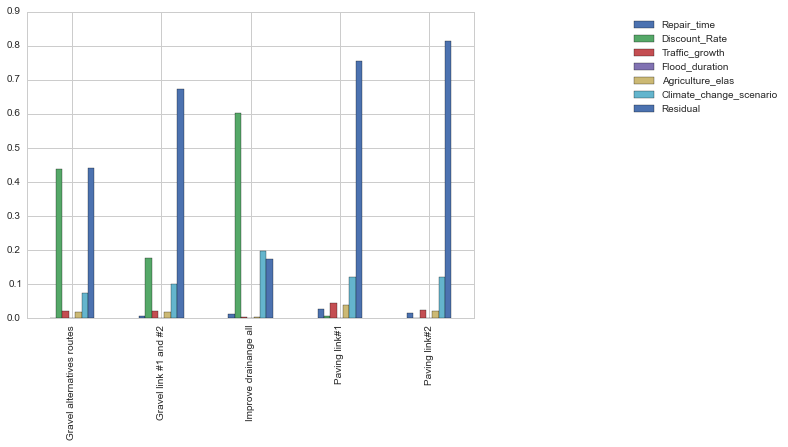

In [43]:
ax=df.T.plot(kind='bar')
ax.legend(bbox_to_anchor=(1.7, 1.))

In [44]:
df2 = pd.DataFrame()

for i in ['Gravel alternatives routes', 'Gravel link #1 and #2', 'Improve drainange all', 'Paving link#1', 'Paving link#2']:

    formula="cost ~ Repair_time + Discount_Rate + Traffic_growth + Flood_duration + Agriculture_elas + Climate_change_scenario"
    olsmodel=ols(formula,data=m.loc[i]).fit()
    table=anova_lm(olsmodel)
    df2[i]=table['sum_sq']/table['sum_sq'].sum()

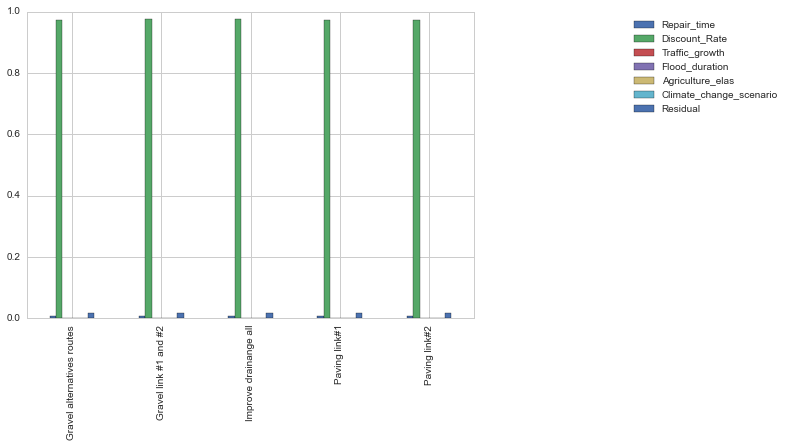

In [45]:
ax=df2.T.plot(kind='bar')
ax.legend(bbox_to_anchor=(1.7, 1.))

In [46]:
m.unstack('intervention').swaplevel(i=1,j=0,axis=1).sample(10)

intervention,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2,...,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2,Gravel alternatives routes,Gravel link #1 and #2,Improve drainange all,Paving link#1,Paving link#2
,cost,cost,cost,cost,cost,benefits,benefits,benefits,benefits,benefits,...,saved_trip_per_dollar,saved_trip_per_dollar,saved_trip_per_dollar,saved_trip_per_dollar,saved_trip_per_dollar,benefit_cost_ratio,benefit_cost_ratio,benefit_cost_ratio,benefit_cost_ratio,benefit_cost_ratio
scenario,,,,,,,,,,,,,,,,,,,,,
1640,61600000,36600000,23500000,23800000,27400000,-38104000,-21104000,51615000,841000,-3542000,...,0.005179,0.008716,0.019149,0.013403,0.011642,-0.618571,-0.576612,2.196383,0.035336,-0.129270
1822,43400000,26000000,20600000,20400000,23800000,-24787000,-14037206,31704012,-1148206,-3246206,...,0.003157,0.005269,0.009320,0.006716,0.005756,-0.571129,-0.539893,1.539030,-0.056285,-0.136395
917,49100000,29300000,21500000,21400000,24900000,-29782000,-16588000,31825000,-1361000,-3638000,...,0.001721,0.002884,0.007442,0.003949,0.003394,-0.606558,-0.566143,1.480233,-0.063598,-0.146104
1016,64100000,38100000,23900000,24300000,27900000,-35509000,-16667000,55290000,5463000,1953000,...,0.001966,0.003307,0.010377,0.005185,0.004516,-0.553963,-0.437454,2.313389,0.224815,0.070000
292,49600000,29600000,21600000,21500000,25000000,-31887000,-18275000,31557000,-3200000,-5068000,...,0.001972,0.003305,0.007824,0.004550,0.003913,-0.642883,-0.617399,1.460972,-0.148837,-0.202720
243,66200000,39300000,24300000,24700000,28300000,-46946000,-27031000,45670000,-4611000,-7501000,...,0.003444,0.005802,0.016132,0.009231,0.008057,-0.709154,-0.687812,1.879424,-0.186680,-0.265053
1516,64100000,38100000,23900000,24300000,27900000,-42662000,-24014000,53532810,-2295000,-5255000,...,0.003136,0.005276,0.011799,0.008272,0.007204,-0.665554,-0.630289,2.239867,-0.094444,-0.188351
1174,48200000,28800000,21400000,21300000,24800000,-22023000,-9659000,39150000,5921000,2781000,...,0.001449,0.002424,0.006402,0.003278,0.002815,-0.456909,-0.335382,1.829439,0.277981,0.112137


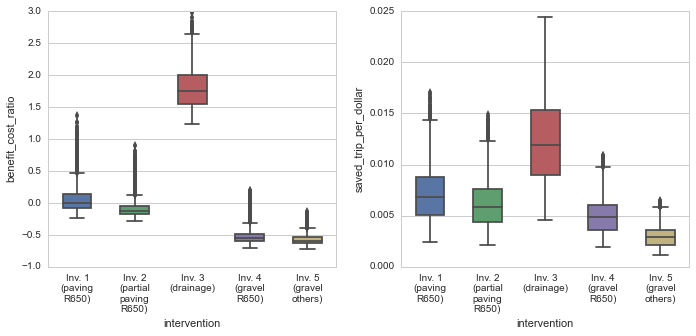

In [47]:
ax=plt.figure(figsize=(10,5))
plt.subplot(121)
ax=sns.boxplot(x='intervention',y='benefit_cost_ratio',data=m.rename(index=new_names2).reset_index(),width=0.5)
plt.subplot(122)
ax=sns.boxplot(x='intervention',y='saved_trip_per_dollar',data=m.rename(index=new_names2).reset_index(),width=0.5)

savefig(figfolder+"cba_results")

In [48]:
cc = dict({0:"CC decreases\nprecipitations",1:"Current\nclimate", 3:"Medium\nincrease in\nprecipitations", 4:"High increase\nin precipiations"})

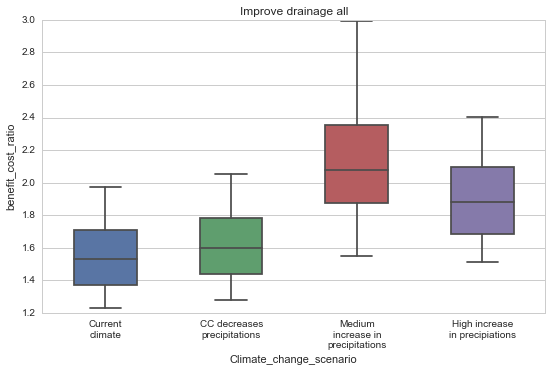

In [49]:
sub=m.rename(index=new_names).reset_index()
sub.Climate_change_scenario.replace(cc,inplace=True)
sns.boxplot(x='Climate_change_scenario',y='benefit_cost_ratio',data=sub[sub.intervention=='drainage'],width=0.5)
plt.title("Improve drainage all")
#savefig("benefit_cost_ratio_drainage")

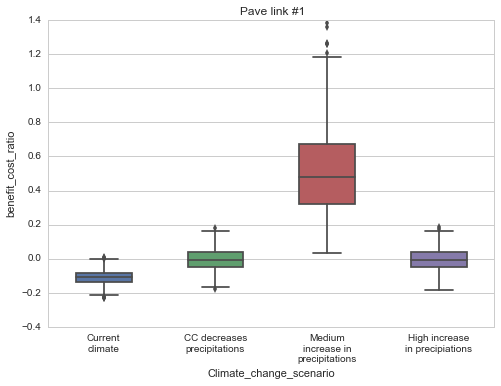

In [50]:
sub=m.rename(index=new_names).reset_index()
sub.Climate_change_scenario.replace(cc,inplace=True)
sns.boxplot(x='Climate_change_scenario',y='benefit_cost_ratio',data=sub[sub.intervention=='Pave1'],width=0.5)
plt.title("Pave link #1")
#savefig("benefit_cost_ratio_pave_1")

In [51]:
regret = m.npv.unstack('intervention').copy()
regret = regret.rename(columns=new_names2).sort(axis=1)

In [52]:
r = regret.add(-regret.max(axis=1),axis=0)

In [53]:
regret.add(-regret.max(axis=1),axis=0).min()

intervention
Inv. 1\n(paving\nR650)             -60061578
Inv. 2\n(partial\npaving\nR650)    -66864578
Inv. 3\n(drainage)                         0
Inv. 4\n(gravel\nR650)             -98418578
Inv. 5\n(gravel\nothers)          -145882578
dtype: float64

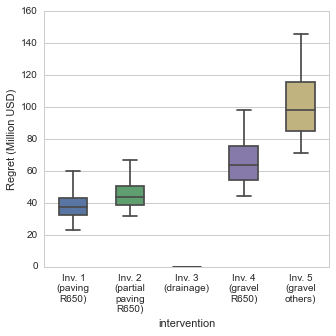

In [54]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(-10**(-6)*regret.add(-regret.max(axis=1),axis=0),width=0.5)
plt.ylabel("Regret (Million USD)")
savefig(figfolder+"regret")

In [55]:
rr=r==0
rr.sum(axis=0)/len(rr)

intervention
Inv. 1\n(paving\nR650)             0
Inv. 2\n(partial\npaving\nR650)    0
Inv. 3\n(drainage)                 1
Inv. 4\n(gravel\nR650)             0
Inv. 5\n(gravel\nothers)           0
dtype: float64

In [49]:
import prim

In [150]:
forprim=m.unstack('intervention').swaplevel(i=1,j=0,axis=1).rename(columns=new_names)

In [214]:
sum(scenarofinterest.npv>0)/2000

0.81100000000000005

In [220]:
forprim.columns

MultiIndex(levels=[['Pave1', 'Pave2', 'drainage', 'gravel12', 'gravelothers'], ['Agriculture_elas', 'Climate_change_scenario', 'Discount_Rate', 'Flood_duration', 'Repair_time', 'Traffic_growth', 'benefit_cost_ratio', 'benefits', 'cost', 'isolated_trips', 'npv', 'saved_trip_per_dollar']],
           labels=[[4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1, 4, 3, 2, 0, 1], [8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 6, 6, 6, 6, 6]],
           names=['intervention', None])

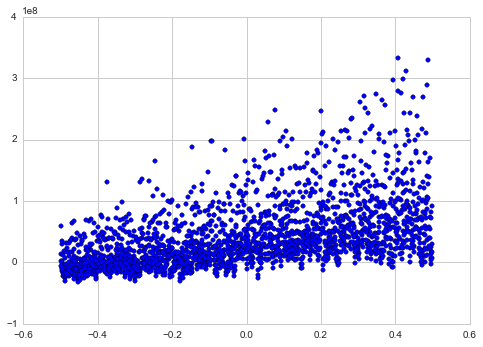

In [222]:
plt.scatter(scenarofinterest.Repair_time,scenarofinterest.npv)

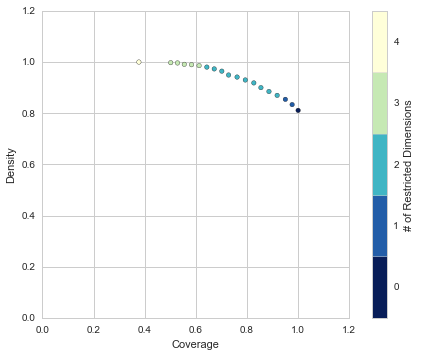

In [210]:
scenarofinterest = forprim.Pave1
p = prim.Prim(scenarofinterest[inputs.columns], scenarofinterest.npv>0, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [219]:
box.select(8)
print(box)

Box 1 [Peeling Trajectory 8]
    Stats
        Coverage: 0.761406
        Density:  0.941311
        Mass:     0.656000
        Res Dim:  2.000000
        Mean:     0.941311
    Limits
                               min       max     qp values
        Repair_time      -0.227503  0.498351  1.352703e-28
        Agriculture_elas  0.500446  1.392167  9.887484e-05


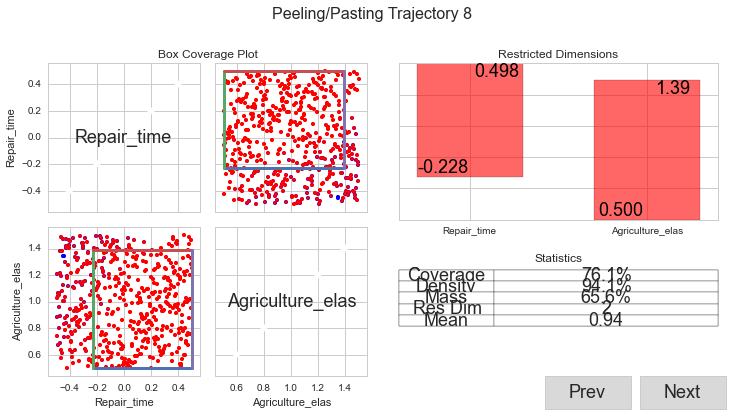

In [216]:
box.show_details();

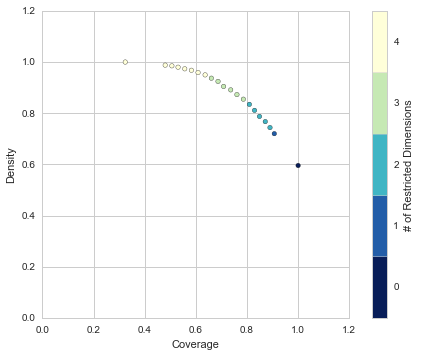

In [155]:
scenarofinterest = forprim.Pave1
p = prim.Prim(scenarofinterest[inputs.columns], forprim.Pave1.npv>forprim.drainage.npv, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [157]:
box.select(5)
print(box)

Box 1 [Peeling Trajectory 5]
    Stats
        Coverage: 0.829555
        Density:  0.811166
        Mass:     0.609000
        Res Dim:  2.000000
        Mean:     0.811166
    Limits
                                      min       max     qp values
        Climate_change_scenario  0.000000  3.000000  5.043476e-26
        Repair_time             -0.312422  0.498351  1.117326e-13


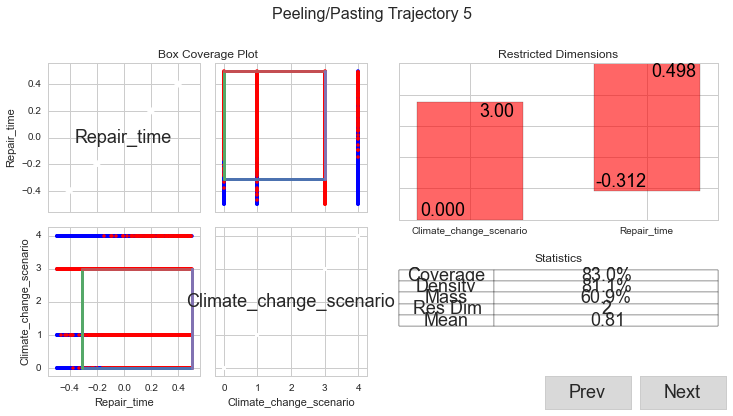

In [158]:
box.show_details();

In [159]:
sum(forprim.Pave1.npv>forprim.drainage.npv)/2000

0.59550000000000003

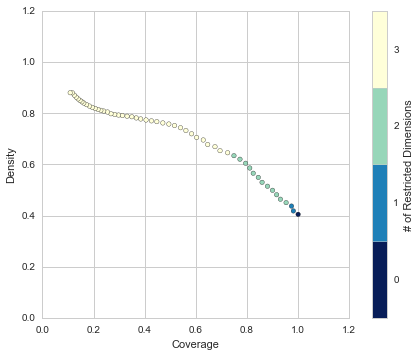

In [160]:
scenarofinterest = forprim.Pave1
p = prim.Prim(scenarofinterest[inputs.columns], forprim.Pave1.npv<forprim.drainage.npv, threshold=0.5, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [162]:
box.select(15)
print(box)

Box 1 [Peeling Trajectory 15]
    Stats
        Coverage: 0.724351
        Density:  0.645374
        Mass:     0.454000
        Res Dim:  3.000000
        Mean:     0.645374
    Limits
                               min       max     qp values
        Repair_time      -0.498815  0.039926  9.364393e-39
        Agriculture_elas  0.585804  1.499111  4.106993e-03
        Traffic_growth    0.000080  0.057402  2.475668e-01


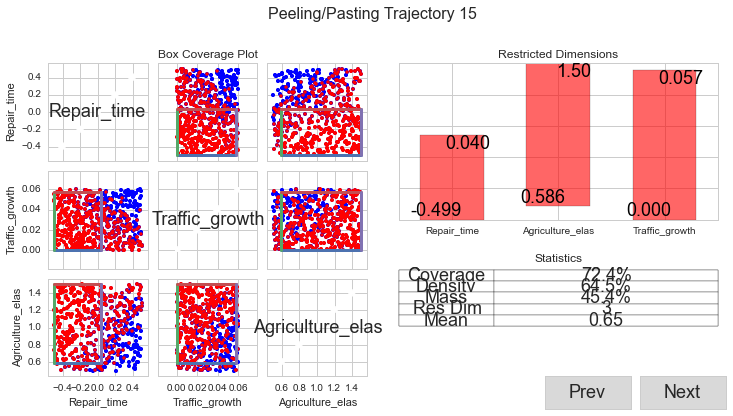

In [163]:
box.show_details();